In [1]:
# set work dir
import os
os.chdir("..")

In [2]:
from matplotlib import pyplot as plt
import scienceplots
import numpy as np
import pandas as pd
from types import SimpleNamespace
plt.style.reload_library()
plt.style.use("science")

In [3]:
def savePlot(data_params, task_params, train_params, task, methods):
    regrets = {mthd:[] for mthd in methods}
    # 3 sp 1 tsp
    regret = getRegret(3, 1, task, data_params, task_params, train_params, methods)
    for mthd in methods:
        regrets[mthd].append(regret[mthd])
    # 6 sp 2 tsp
    regret = getRegret(6, 2, task, data_params, task_params, train_params, methods)
    for mthd in methods:
        regrets[mthd].append(regret[mthd])
    # 9 sp 3 tsp
    regret = getRegret(9, 3, task, data_params, task_params, train_params, methods)
    for mthd in methods:
        regrets[mthd].append(regret[mthd])
    # 12 sp 4 tsp
    regret = getRegret(12, 4, task, data_params, task_params, train_params, methods)
    for mthd in methods:
        regrets[mthd].append(regret[mthd])
    # 15 sp 5 tsp
    regret = getRegret(15, 5, task, data_params, task_params, train_params, methods)
    for mthd in methods:
        regrets[mthd].append(regret[mthd])
    # plot
    plotRegret(regrets, task)

In [4]:
def getRegret(n_sp, n_tsp, task, data_params, task_params, train_params, methods):
    task_args["n_sp"] = n_sp
    task_args["n_tsp"] = n_tsp
    # load data
    regret = {}
    res_dir = getDir(data_params, task_params, train_params)
    df = pd.read_csv(res_dir + "/res.csv")
    for i in df.index:
        mthd = df.at[i,"Method"]
        if mthd in methods:
            try:
                regret[mthd] = df.at[i,"{} Avg Regret".format(task)]
            except:
                regret[mthd] = np.nan
    return regret

In [5]:
def getDir(data_params, task_params, train_params):
    """
    Get dir to save figure and result
    """
    n = data_params["data"] # number of data
    p = data_params["feat"] # size of feature
    deg = data_params["deg"] # polynomial degree
    n_sp = task_params["n_sp"] # number of sp tasks
    n_tsp = task_params["n_tsp"] # number of tsp tasks
    algo = train_params["algo"] # training algo
    # results
    res_dir = "./res/{}sp{}tsp/{}/n{}p{}deg{}".format(n_sp, n_tsp, algo, n, p, deg)
    os.makedirs(res_dir, exist_ok=True)
    return res_dir

In [6]:
def plotRegret(regrets, task):
    """
    Plot regret
    """
    # colors
    colors = {"mse": "#332288", "separated":"#88ccee", "separated+mse":"#44aa99",
              "comb": "#117733", "comb+mse": "#999933", "gradnorm": "#ddcc77",
              "gradnorm+mse":"#cc6677", "scheduled": "#882255"}
    # draw plot
    fig = plt.figure(figsize=(8, 6))
    # separated to avg
    for mthd in regrets:
        if mthd[:9] == "separated":
            regrets[mthd] = [None if np.isnan(r) else np.nanmean(regrets[mthd]) for r in regrets[mthd]]
    for mthd in regrets:
        plt.plot(regrets[mthd], color=colors[mthd], lw=2, label=mthd)
    # tick & label
    labels = ["3 SP\n1 TSP", "6 SP\n2 TSP", "9 SP\n3 TSP", "12 SP\n4 TSP", "15 SP\n5 TSP"]
    plt.xticks(ticks=range(5), labels=labels, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim(-0.2, 4.2)
    if task.split()[0] == "SP":
        plt.ylim(0, 2.5)
    if task.split()[0] == "TSP":
        plt.ylim(0, 7)
    plt.ylabel("Avg Regret", fontsize=24)
    plt.legend(fontsize=18)
    plt.title("Task: {}".format(task), fontsize=24)
    # save
    save_dir = "./res/task_" + task.lower().replace(" ", "") + ".png"
    fig.savefig(save_dir, dpi=300)
    save_dir = "./res/task_" + task.lower().replace(" ", "") + ".pdf"
    fig.savefig(save_dir, dpi=300)
    plt.show()

In [7]:
# args
data_args = {
    "node":  30,
    "data":  100,
    "feat":  10,
    "deg":   4,
    "noise": 0.5,
}
task_args = {
    "n_sp":  None,
    "n_tsp": None,
}
train_args = {
    "algo":  None,
}

## PFYL 

In [8]:
methods = ["separated", "comb", "gradnorm"]
train_args["algo"] = "pfyl"

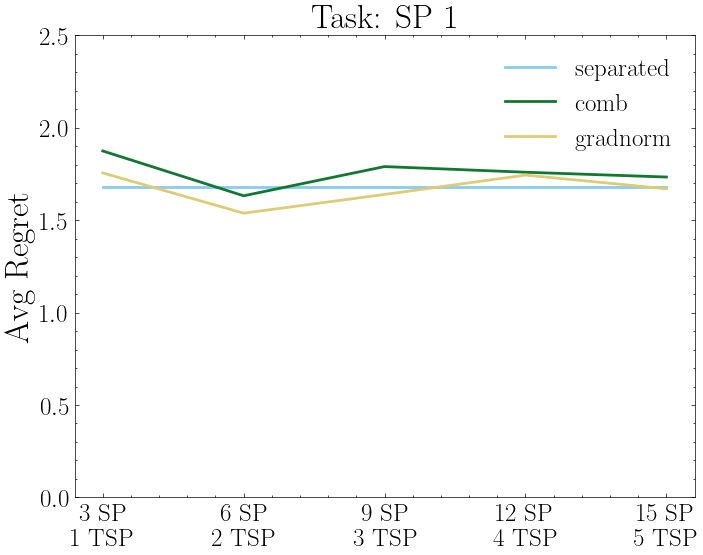

In [9]:
savePlot(data_args, task_args, train_args, "SP 1", methods)

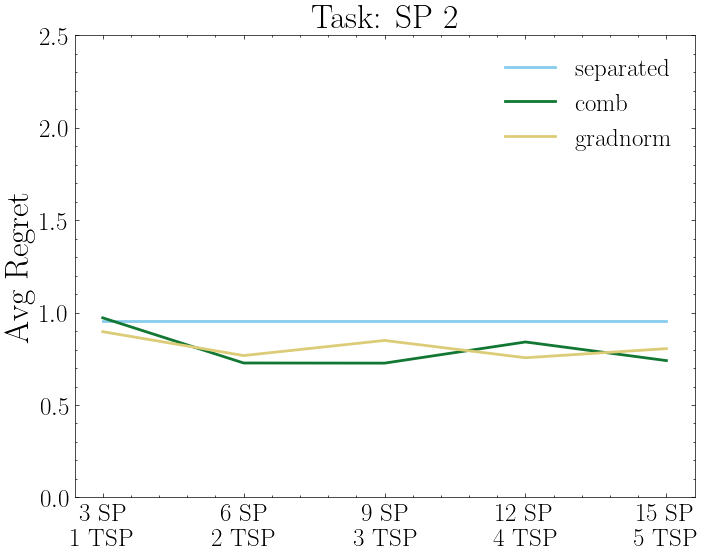

In [10]:
savePlot(data_args, task_args, train_args, "SP 2", methods)

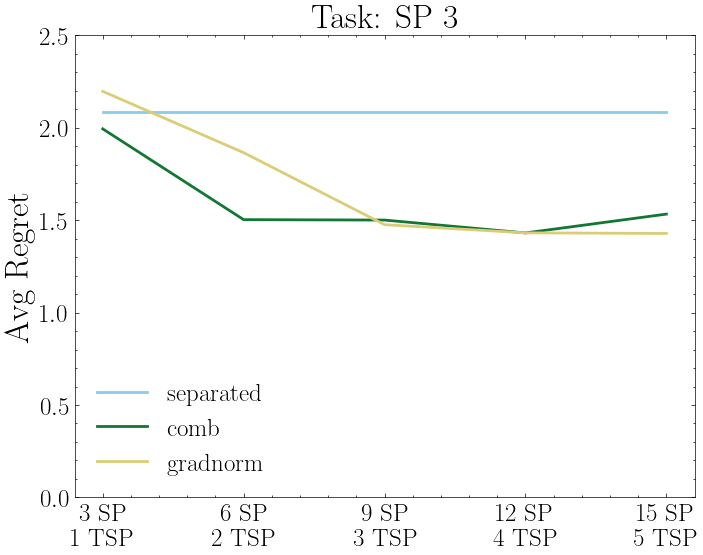

In [11]:
savePlot(data_args, task_args, train_args, "SP 3", methods)

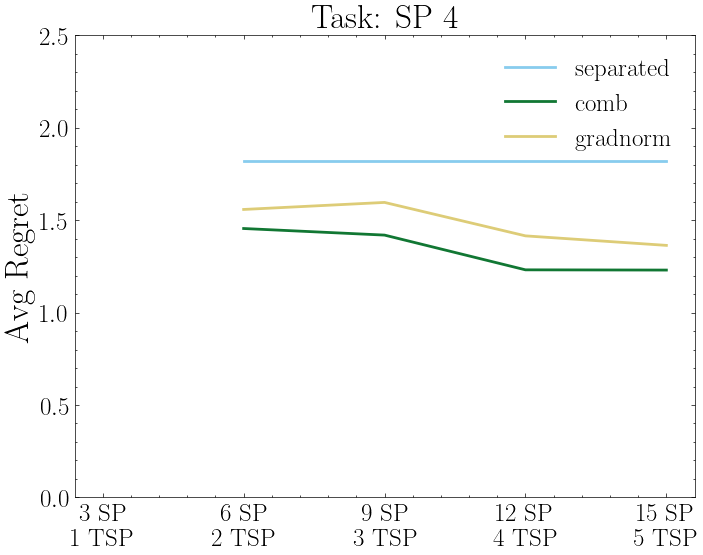

In [12]:
savePlot(data_args, task_args, train_args, "SP 4", methods)

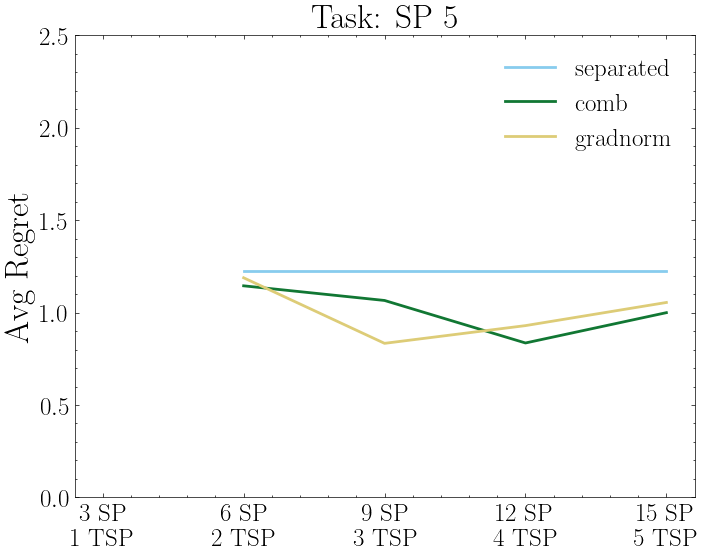

In [13]:
savePlot(data_args, task_args, train_args, "SP 5", methods)

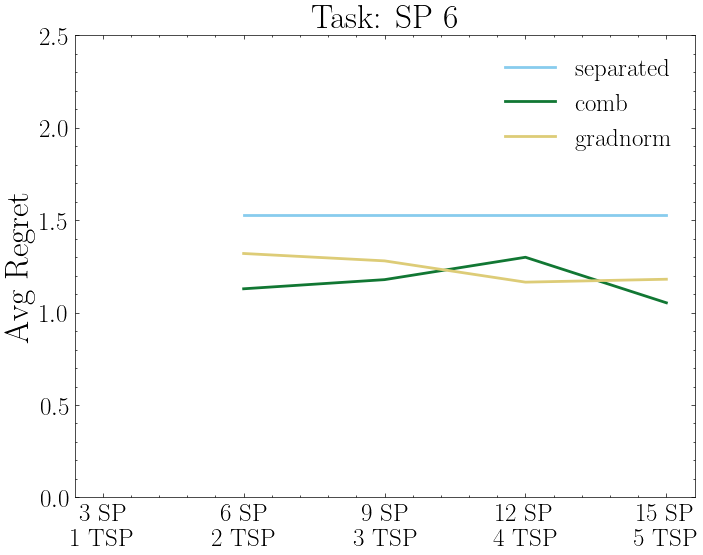

In [14]:
savePlot(data_args, task_args, train_args, "SP 6", methods)

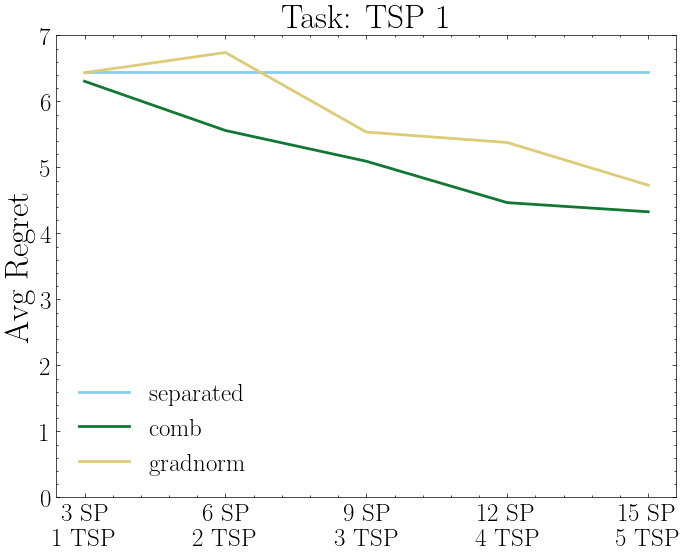

In [15]:
savePlot(data_args, task_args, train_args, "TSP 1", methods)

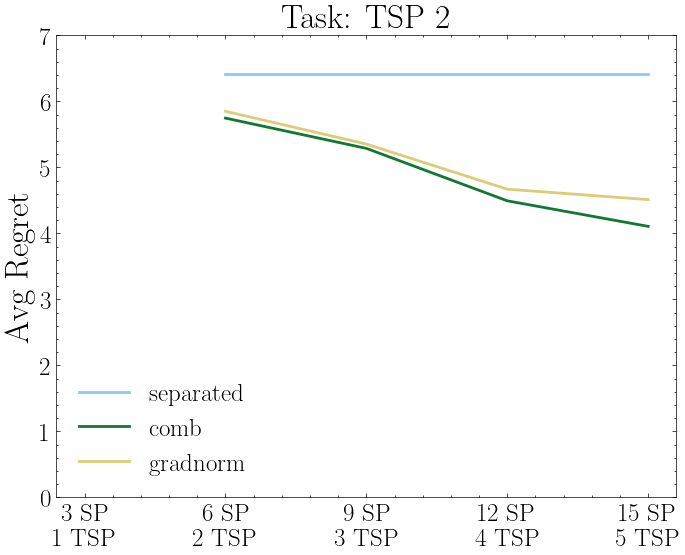

In [16]:
savePlot(data_args, task_args, train_args, "TSP 2", methods)